In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics -q

import ultralytics
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/107.7 GB disk)


In [4]:
!ls

drive


In [5]:
from ultralytics import YOLO

In [6]:
model = YOLO('/content/drive/MyDrive/IOU testing/best.pt')

import os
import random

#random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
#file_name = os.path.join(f"{dataset.location}/test/images", random_file)
file_name = '/content/drive/MyDrive/IOU testing/IoU test/313_jpg.rf.d04383ddcdd69acfecc3e5a46530544e.jpg'
results = model(file_name)

print(results[0])


image 1/1 /content/drive/MyDrive/IOU testing/IoU test/313_jpg.rf.d04383ddcdd69acfecc3e5a46530544e.jpg: 640x640 728.3ms
Speed: 11.4ms preprocess, 728.3ms inference, 58.3ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'LCD', 1: 'LCU', 2: 'LID', 3: 'LIU', 4: 'LMD', 5: 'LMU', 6: 'LPMD', 7: 'LPMU', 8: 'RCD', 9: 'RCU', 10: 'RID', 11: 'RIU', 12: 'RMD', 13: 'RMU', 14: 'RPMD', 15: 'RPMU'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[ 82,  82,  82],
        [ 86,  86,  86],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [ 90,  90,  90],
        [ 78,  78,  78]],

       [[252, 252, 252],
        [251, 251, 251],
        [253, 253, 253],
        ...,
        [249, 249, 249],
        [248, 248, 248],
        [245, 245, 245]],

       [[253, 253, 253],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [249, 249, 249],
      

In [7]:
#results = model('/content/387_jpg.rf.bbba86d6c7f9c9dd610eceb05e123bd3.jpg')
obb = results[0].obb
xywhr = obb.xywhr
print(xywhr.shape)
print(xywhr)
#torch.Size([31, 5])
if xywhr.is_cuda:  # Check if the tensor is on GPU
    xywhr = xywhr.cpu()  # Move the tensor to the CPU

# Now, you can safely convert to numpy
xywhr = xywhr.numpy()


torch.Size([32, 5])
tensor([[263.8897, 466.2540, 135.6880,  30.7303,   1.7283],
        [252.9921, 327.8450, 142.3151,  31.0759,   1.6203],
        [334.6184, 337.7638, 138.5678,  31.9733,   1.6030],
        [183.7394, 449.0874, 145.3243,  49.5958,   1.8489],
        [386.8553, 328.6321, 135.8313,  30.2557,   1.5267],
        [114.7902, 271.0251, 126.2562,  38.8337,   1.6996],
        [457.0492, 295.1251, 143.7493,  41.7645,   1.5618],
        [490.9828, 419.3825, 138.2098,  47.2528,   1.3380],
        [233.2439, 324.7299, 129.1691,  30.0767,   1.6402],
        [452.7195, 437.5157, 143.6225,  51.1724,   1.3147],
        [348.1642, 460.8448, 105.6589,  25.0821,   1.5575],
        [215.2529, 463.2667, 140.0811,  35.8934,   1.7605],
        [143.2716, 429.1735, 138.1638,  46.9989,   1.8390],
        [147.1607, 287.0250, 138.1449,  41.1110,   1.6573],
        [180.7863, 304.8603, 133.6938,  44.1298,   1.5366],
        [292.0185, 462.9477, 110.3682,  25.1291,   1.5528],
        [420.7166, 4

# Single cell Run

# Match one to one

# Supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 2.0 MB/s eta 0:00:00


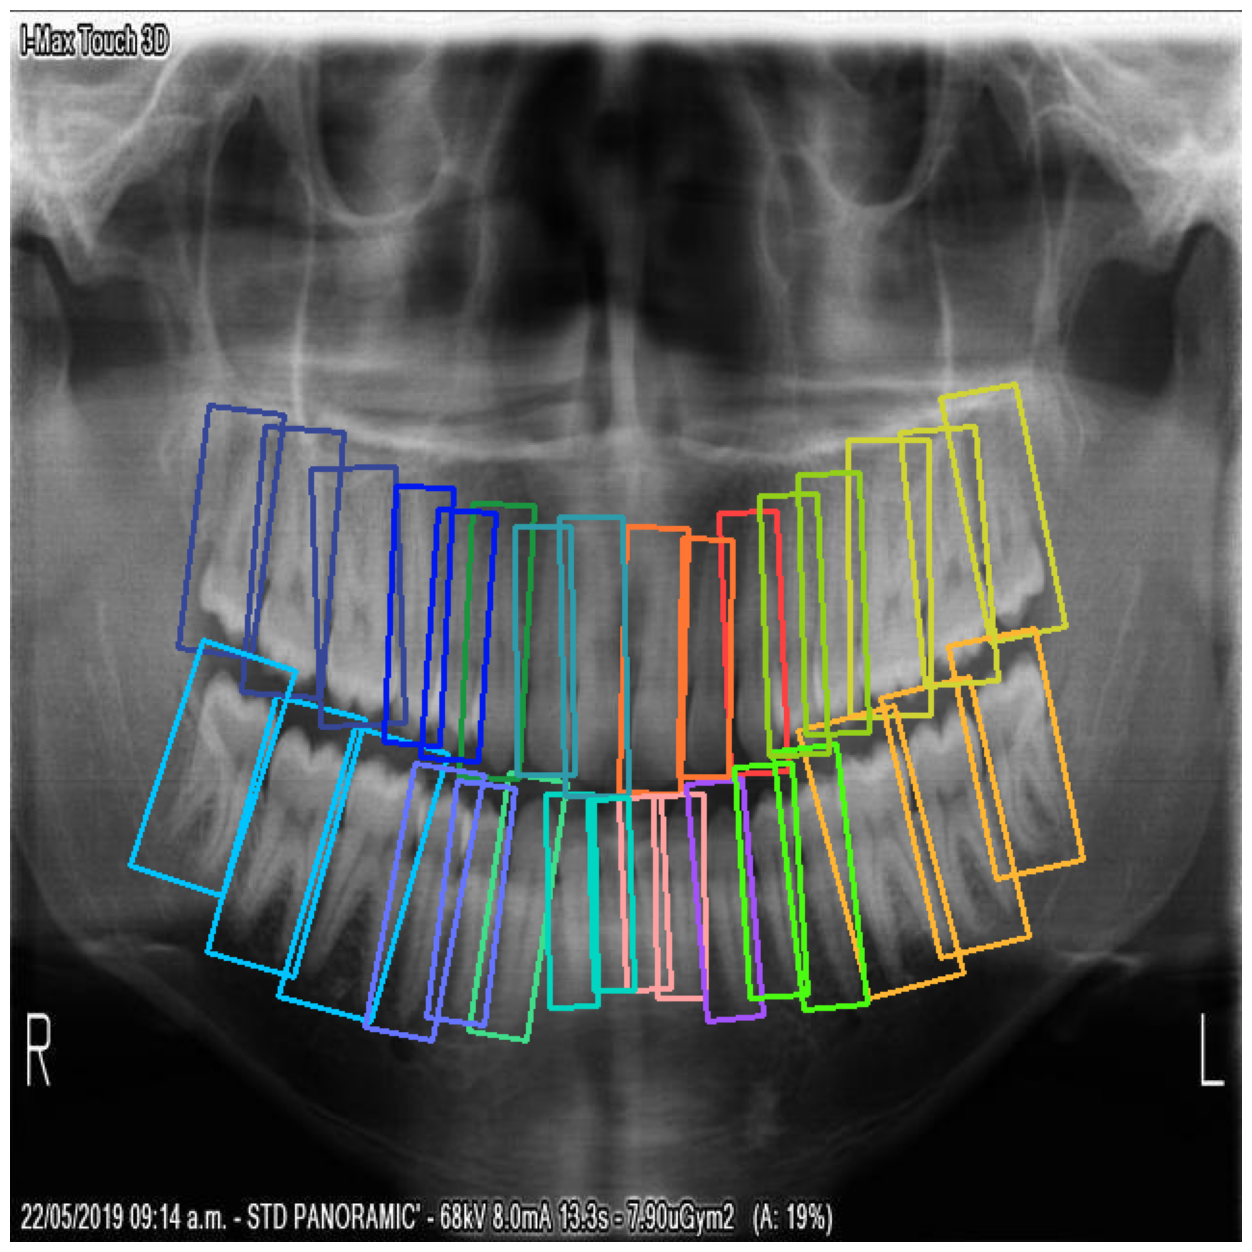

In [8]:
!pip install supervision==0.18.0 -q

import supervision as sv
import cv2

detections = sv.Detections.from_ultralytics(results[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name),
    detections=detections
)

sv.plot_image(image=annotated_frame, size=(16, 16))

In [11]:
file_name1 = '/content/drive/MyDrive/IOU testing/IoU test/313_copy.jpg'
result1 = model(file_name1)

print(result1[0])


image 1/1 /content/drive/MyDrive/IOU testing/IoU test/313_copy.jpg: 640x640 867.5ms
Speed: 16.5ms preprocess, 867.5ms inference, 14.5ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'LCD', 1: 'LCU', 2: 'LID', 3: 'LIU', 4: 'LMD', 5: 'LMU', 6: 'LPMD', 7: 'LPMU', 8: 'RCD', 9: 'RCU', 10: 'RID', 11: 'RIU', 12: 'RMD', 13: 'RMU', 14: 'RPMD', 15: 'RPMU'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[ 81,  81,  81],
        [ 88,  88,  88],
        [ 99,  99,  99],
        ...,
        [ 99,  99,  99],
        [ 90,  90,  90],
        [ 78,  78,  78]],

       [[250, 250, 250],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [251, 251, 251],
        [249, 249, 249],
        [245, 245, 245]],

       [[254, 254, 254],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [248, 248, 248],
        [252, 252, 252],
        [255, 25

In [12]:
#results = model('/content/387_jpg.rf.bbba86d6c7f9c9dd610eceb05e123bd3.jpg')
obb1 = result1[0].obb
xywhr1 = obb1.xywhr
print(xywhr1.shape)
print(xywhr1)
#torch.Size([31, 5])
if xywhr1.is_cuda:  # Check if the tensor is on GPU
    xywhr1 = xywhr.cpu()  # Move the tensor to the CPU

# Now, you can safely convert to numpy
xywhr1 = xywhr1.numpy()


torch.Size([30, 5])
tensor([[146.1458, 287.1172, 139.2529,  40.6891,   1.6450],
        [334.7428, 337.2029, 139.7055,  31.9686,   1.6040],
        [211.4142, 314.0081, 136.1620,  29.9507,   1.6056],
        [232.7519, 323.0845, 132.7308,  29.0166,   1.6266],
        [263.8171, 466.3444, 136.8903,  30.8367,   1.7277],
        [491.0689, 419.4848, 138.0741,  47.1867,   1.3374],
        [457.1500, 294.8542, 144.0457,  41.4420,   1.5630],
        [452.9536, 437.7536, 144.0286,  51.2620,   1.3139],
        [114.9412, 271.1847, 127.8126,  38.5453,   1.6977],
        [386.8954, 327.4227, 137.8680,  30.5878,   1.5319],
        [371.4430, 462.4049, 123.6944,  29.5037,   1.4837],
        [348.2005, 461.0212, 105.9712,  25.0575,   1.5564],
        [179.8696, 302.5515, 139.3065,  43.7641,   1.5655],
        [185.8314, 450.7622, 148.0890,  48.2961,   1.7857],
        [214.7218, 464.0427, 142.1785,  34.6347,   1.7611],
        [292.0107, 463.2193, 110.5561,  25.4953,   1.5546],
        [420.8180, 4

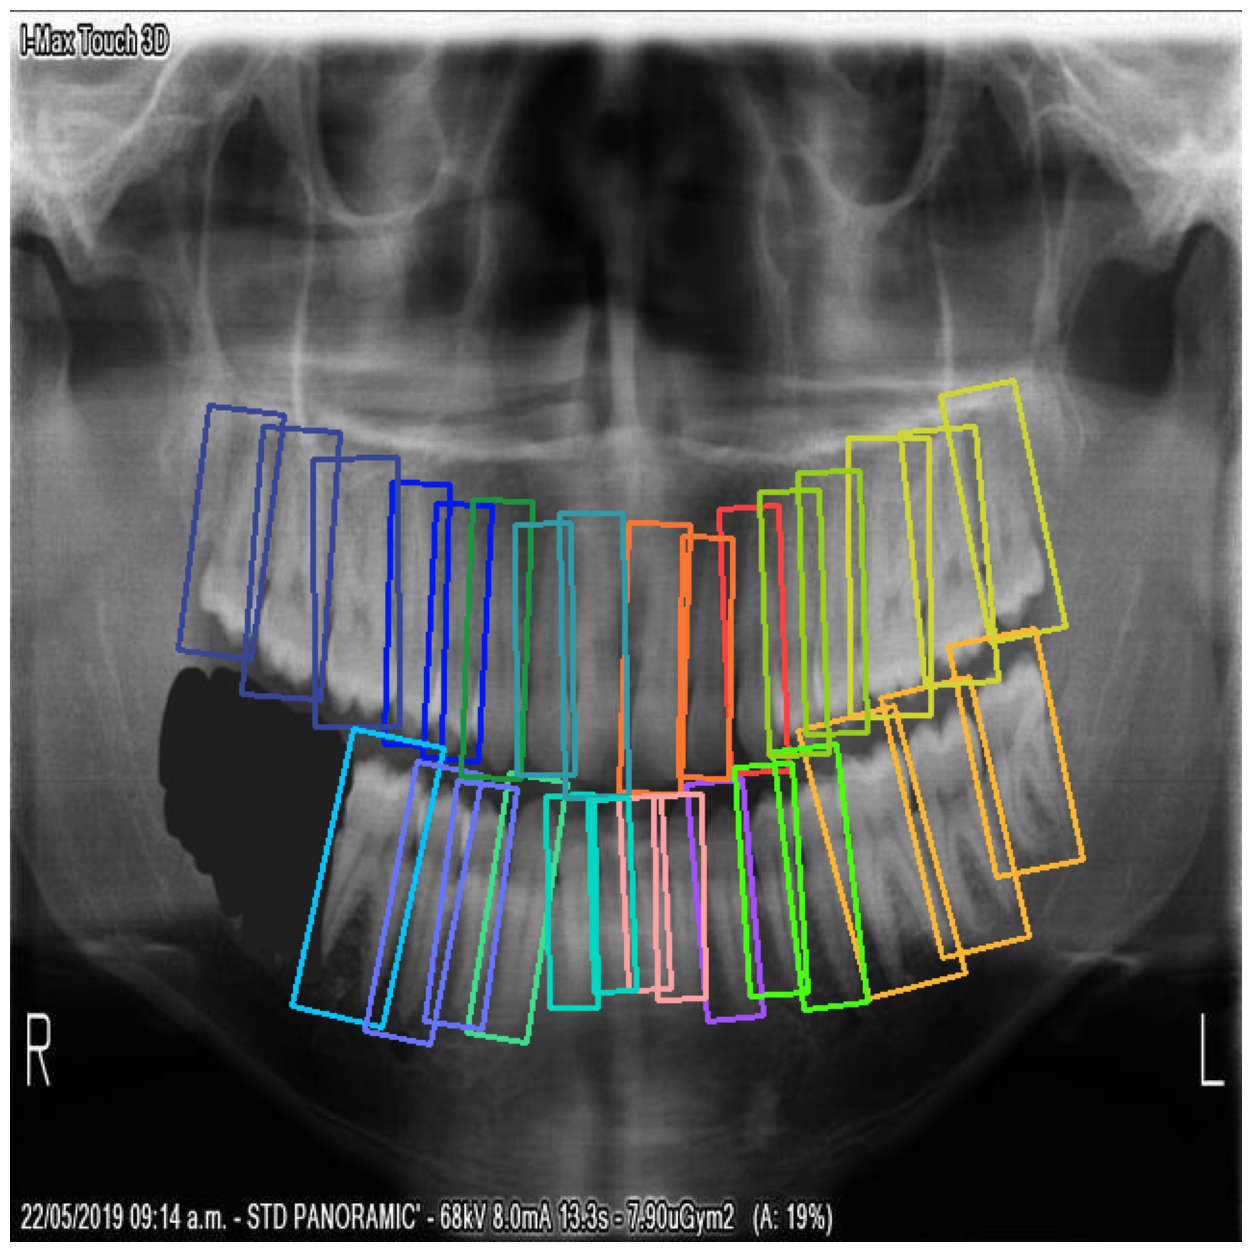

In [13]:
detections = sv.Detections.from_ultralytics(result1[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name1),
    detections=detections
)

sv.plot_image(image=annotated_frame, size=(16, 16))

In [14]:
import torch
import numpy as np
from shapely.geometry import Polygon
from shapely.affinity import rotate, translate

def create_obb(cx, cy, w, h, theta):
    """Create an Oriented Bounding Box (OBB) as a Shapely polygon."""
    rectangle = Polygon([(-w/2, -h/2), (w/2, -h/2), (w/2, h/2), (-w/2, h/2)])
    rotated_rect = rotate(rectangle, theta, use_radians=True)
    obb = translate(rotated_rect, cx, cy)
    return obb

def compute_iou(obb1, obb2):
    """Compute IoU between two OBBs."""
    intersection_area = obb1.intersection(obb2).area
    union_area = obb1.area + obb2.area - intersection_area
    return intersection_area / union_area if union_area > 0 else 0

# Assuming 'result1' and 'result2' are the outputs from two images
def calculate_ious(results, result1):
    """Calculate IoU for all bounding box pairs between two images."""
    xywhr1 = results[0].obb.xywhr
    xywhr2 = result1[0].obb.xywhr

    # Move tensors to CPU and convert to numpy if necessary
    if xywhr1.is_cuda:
        xywhr1 = xywhr1.cpu().numpy()
    else:
        xywhr1 = xywhr1.numpy()

    if xywhr2.is_cuda:
        xywhr2 = xywhr2.cpu().numpy()
    else:
        xywhr2 = xywhr2.numpy()

    iou_matrix = np.zeros((len(xywhr1), len(xywhr2)))

    for i, (cx1, cy1, w1, h1, theta1) in enumerate(xywhr1):
        obb1 = create_obb(cx1, cy1, w1, h1, theta1)
        for j, (cx2, cy2, w2, h2, theta2) in enumerate(xywhr2):
            obb2 = create_obb(cx2, cy2, w2, h2, theta2)
            iou_matrix[i, j] = compute_iou(obb1, obb2)

    return iou_matrix

# Example usage:
iou_matrix = calculate_ious(results, result1)
print(iou_matrix)


[[          0           0           0           0     0.98696           0           0           0           0           0           0           0           0           0           0    0.045531           0    0.001316  0.00081581           0           0           0           0           0           0           0
   2.3658e-05           0           0      0.1078]
 [          0           0           0     0.18193   0.0019289           0           0           0           0           0           0           0           0           0   0.0023635           0           0     0.96262           0           0           0           0           0           0           0           0
     0.088102           0           0           0]
 [          0     0.98532           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0    0.028305           0    0.040196           0     

In [15]:
# prompt: show me the IOU values pair wise and cut down all the values that is less than 0.5

iou_matrix_filtered = iou_matrix[iou_matrix >= 0.5]
iou_matrix_filtered


array([    0.98696,     0.96262,     0.98532,     0.86904,     0.96807,     0.97836,     0.98846,     0.99567,     0.92449,     0.98955,     0.99336,     0.95119,     0.94469,     0.91078,     0.98083,     0.99018,     0.99434,     0.98707,     0.97716,     0.92822,     0.98614,     0.98915,     0.98249,     0.97842,
           0.98036,     0.97778,     0.99289,     0.99487,     0.98533,     0.96843])

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import rotate, translate
import matplotlib.patches as patches

def create_obb(cx, cy, w, h, theta):
    """Create an Oriented Bounding Box (OBB) as a Shapely polygon."""
    rectangle = Polygon([(-w/2, -h/2), (w/2, -h/2), (w/2, h/2), (-w/2, h/2)])
    rotated_rect = rotate(rectangle, theta, use_radians=True)
    obb = translate(rotated_rect, cx, cy)
    return obb

def compute_iou(obb1, obb2):
    """Compute IoU between two OBBs."""
    intersection_area = obb1.intersection(obb2).area
    union_area = obb1.area + obb2.area - intersection_area
    return intersection_area / union_area if union_area > 0 else 0

def extract_boxes(result):
    """Extract OBBs from model result and move to numpy if needed."""
    xywhr = result[0].obb.xywhr
    if xywhr.is_cuda:
        xywhr = xywhr.cpu().numpy()
    else:
        xywhr = xywhr.numpy()
    return xywhr

def calculate_ious(result1, result2):
    """Calculate IoU for all bounding box pairs between two images."""
    xywhr1 = extract_boxes(result1)
    xywhr2 = extract_boxes(result2)

    iou_matrix = np.zeros((len(xywhr1), len(xywhr2)))
    obb_list1, obb_list2 = [], []

    for i, (cx1, cy1, w1, h1, theta1) in enumerate(xywhr1):
        obb1 = create_obb(cx1, cy1, w1, h1, theta1)
        obb_list1.append(obb1)
        for j, (cx2, cy2, w2, h2, theta2) in enumerate(xywhr2):
            obb2 = create_obb(cx2, cy2, w2, h2, theta2)
            obb_list2.append(obb2)
            iou_matrix[i, j] = compute_iou(obb1, obb2)

    return iou_matrix, obb_list1, obb_list2

def plot_obb(ax, obb, color='r', label=None):
    """Plot an oriented bounding box (OBB)."""
    x, y = obb.exterior.xy
    ax.plot(x, y, color=color, linewidth=2, label=label)

def visualize_results(image, obb_list1, obb_list2, iou_matrix):
    """Visualize bounding boxes and IoUs."""
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image, cmap='gray')

    # Plot bounding boxes from image 1
    for obb in obb_list1:
        plot_obb(ax, obb, color='blue')

    # Plot bounding boxes from image 2
    for obb in obb_list2:
        plot_obb(ax, obb, color='red')

    # Display IoU values
    for i in range(len(obb_list1)):
        for j in range(len(obb_list2)):
            if iou_matrix[i, j] > 0:  # Only display non-zero IoUs
                cx, cy = list(obb_list1[i].centroid.coords)[0]
                ax.text(cx, cy, f"{iou_matrix[i, j]:.2f}", fontsize=8, color='yellow', ha='center')

    ax.set_title("Bounding Box IoU Visualization")
    plt.legend(["Image 1 (Blue)", "Image 2 (Red)"])
    plt.show()

# Example usage:
iou_matrix, obb_list1, obb_list2 = calculate_ious(results, result1)
visualize_results(image, obb_list1, obb_list2, iou_matrix)



image 1/1 /content/drive/MyDrive/IOU testing/IoU test/313_jpg.rf.d04383ddcdd69acfecc3e5a46530544e.jpg: 640x640 701.9ms
Speed: 11.0ms preprocess, 701.9ms inference, 23.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/IOU testing/IoU test/313_copy.jpg: 640x640 877.0ms
Speed: 4.8ms preprocess, 877.0ms inference, 16.7ms postprocess per image at shape (1, 3, 640, 640)
IoU Matrix:
 [[          0           0           0           0     0.98696           0           0           0           0           0           0           0           0           0           0    0.045531           0    0.001316  0.00081581           0           0           0           0           0           0           0
   2.3658e-05           0           0      0.1078]
 [          0           0           0     0.18193   0.0019289           0           0           0           0           0           0           0           0           0   0.0023635           0           0     0.96262 

IndexError: index 30 is out of bounds for axis 1 with size 30

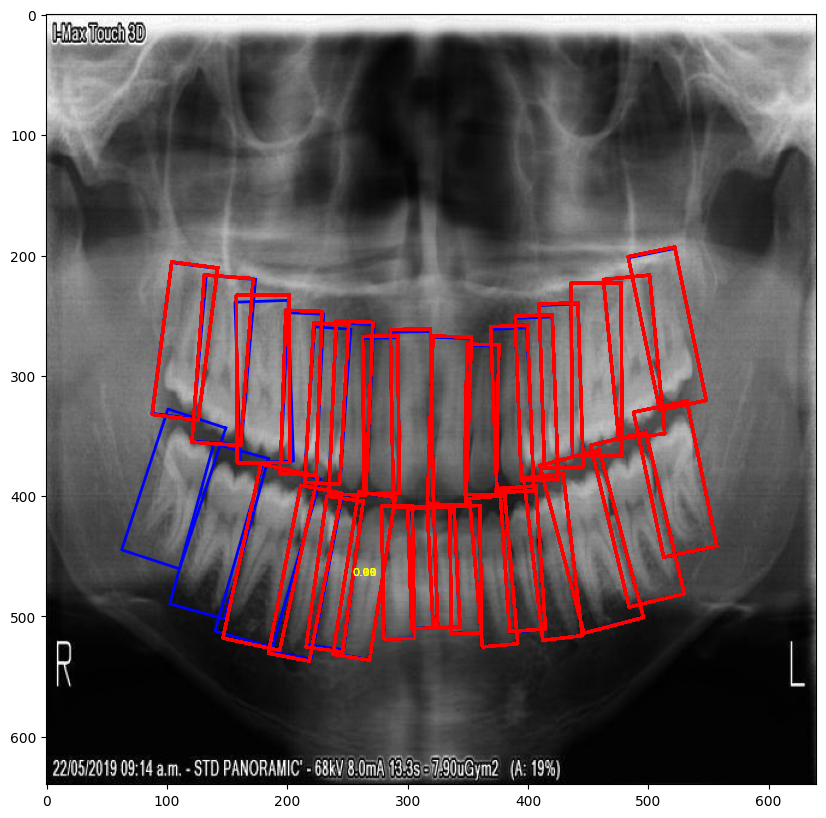

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from shapely.geometry import Polygon
from shapely.affinity import rotate, translate

def create_obb(cx, cy, w, h, theta):
    """Create an Oriented Bounding Box (OBB) as a Shapely polygon."""
    rectangle = Polygon([(-w/2, -h/2), (w/2, -h/2), (w/2, h/2), (-w/2, h/2)])
    rotated_rect = rotate(rectangle, theta, use_radians=True)
    obb = translate(rotated_rect, cx, cy)
    return obb

def compute_iou(obb1, obb2):
    """Compute IoU between two OBBs."""
    intersection_area = obb1.intersection(obb2).area
    union_area = obb1.area + obb2.area - intersection_area
    return intersection_area / union_area if union_area > 0 else 0

def extract_boxes(result):
    """Extract OBBs from model result and move to numpy if needed."""
    xywhr = result[0].obb.xywhr
    if xywhr.is_cuda:
        xywhr = xywhr.cpu().numpy()
    else:
        xywhr = xywhr.numpy()
    return xywhr

def calculate_ious(result1, result2):
    """Calculate IoU for all bounding box pairs between two images."""
    xywhr1 = extract_boxes(result1)
    xywhr2 = extract_boxes(result2)

    iou_matrix = np.zeros((len(xywhr1), len(xywhr2)))
    obb_list1, obb_list2 = [], []

    for i, (cx1, cy1, w1, h1, theta1) in enumerate(xywhr1):
        obb1 = create_obb(cx1, cy1, w1, h1, theta1)
        obb_list1.append(obb1)
        for j, (cx2, cy2, w2, h2, theta2) in enumerate(xywhr2):
            obb2 = create_obb(cx2, cy2, w2, h2, theta2)
            obb_list2.append(obb2)
            iou_matrix[i, j] = compute_iou(obb1, obb2)

    return iou_matrix, obb_list1, obb_list2

def plot_obb(ax, obb, color='r', label=None):
    """Plot an oriented bounding box (OBB)."""
    x, y = obb.exterior.xy
    ax.plot(x, y, color=color, linewidth=2, label=label)

def visualize_results(image, obb_list1, obb_list2, iou_matrix):
    """Visualize bounding boxes and IoUs."""
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image, cmap='gray')

    # Plot bounding boxes from image 1
    for obb in obb_list1:
        plot_obb(ax, obb, color='blue')

    # Plot bounding boxes from image 2
    for obb in obb_list2:
        plot_obb(ax, obb, color='red')

    # Display IoU values
    for i in range(len(obb_list1)):
        for j in range(len(obb_list2)):
            if iou_matrix[i, j] > 0:  # Only display non-zero IoUs
                cx, cy = list(obb_list1[i].centroid.coords)[0]
                ax.text(cx, cy, f"{iou_matrix[i, j]:.2f}", fontsize=8, color='yellow', ha='center')

    ax.set_title("Bounding Box IoU Visualization")
    plt.legend(["Image 1 (Blue)", "Image 2 (Red)"])
    plt.show()

# ===== Example Usage =====

# Load images
image1 = Image.open("/content/drive/MyDrive/IOU testing/IoU test/313_jpg.rf.d04383ddcdd69acfecc3e5a46530544e.jpg").convert("L")  # Convert to grayscale
image2 = Image.open("/content/drive/MyDrive/IOU testing/IoU test/313_copy.jpg").convert("L")

# Run model to get predictions
result1 = model("/content/drive/MyDrive/IOU testing/IoU test/313_jpg.rf.d04383ddcdd69acfecc3e5a46530544e.jpg")
result2 = model("/content/drive/MyDrive/IOU testing/IoU test/313_copy.jpg")

# Compute IoUs
iou_matrix, obb_list1, obb_list2 = calculate_ious(result1, result2)

# Print IoU matrix
print("IoU Matrix:\n", iou_matrix)

# Visualize results
visualize_results(image1, obb_list1, obb_list2, iou_matrix)


In [ ]:
# prompt: one image has less teeth so it should contain 30 teeth. also cut down the IOU values less than 0.5

# Filter the IoU matrix to only include values greater than or equal to 0.5
iou_matrix_filtered = iou_matrix[iou_matrix >= 0.5]

# Assuming xywhr1 and xywhr2 are the output from your model for the two images
# and have been processed to be numpy arrays
def adjust_teeth_count(xywhr, target_teeth=30):
    """Adjusts the number of teeth in the bounding box predictions."""
    if len(xywhr) < target_teeth:
        # Duplicate existing boxes to reach the target count
        num_to_add = target_teeth - len(xywhr)
        indices_to_duplicate = np.random.choice(len(xywhr), size=num_to_add, replace=True)  # Sample with replacement
        added_boxes = xywhr[indices_to_duplicate]
        #add some noise to the duplicated boxes
        noise = np.random.normal(0, 0.1, added_boxes.shape)
        added_boxes = added_boxes + noise

        xywhr = np.concatenate((xywhr, added_boxes))
    elif len(xywhr) > target_teeth:
        # Randomly remove boxes until the target is met
        indices_to_keep = np.random.choice(len(xywhr), size=target_teeth, replace=False)
        xywhr = xywhr[indices_to_keep]
    return xywhr

# Example usage
xywhr1 = adjust_teeth_count(xywhr1)
xywhr2 = adjust_teeth_count(xywhr2)

print("Adjusted xywhr1 shape:", xywhr1.shape)
print("Adjusted xywhr2 shape:", xywhr2.shape)

#Recompute IoU matrix with the new adjusted boxes
iou_matrix, obb_list1, obb_list2 = calculate_ious(results, result1)
print(iou_matrix)
visualize_results(image1, obb_list1, obb_list2, iou_matrix)



image 1/1 /content/drive/MyDrive/IOU testing/IoU test/387_jpg.rf.bbba86d6c7f9c9dd610eceb05e123bd3.jpg: 640x640 792.4ms
Speed: 3.6ms preprocess, 792.4ms inference, 26.3ms postprocess per image at shape (1, 3, 640, 640)


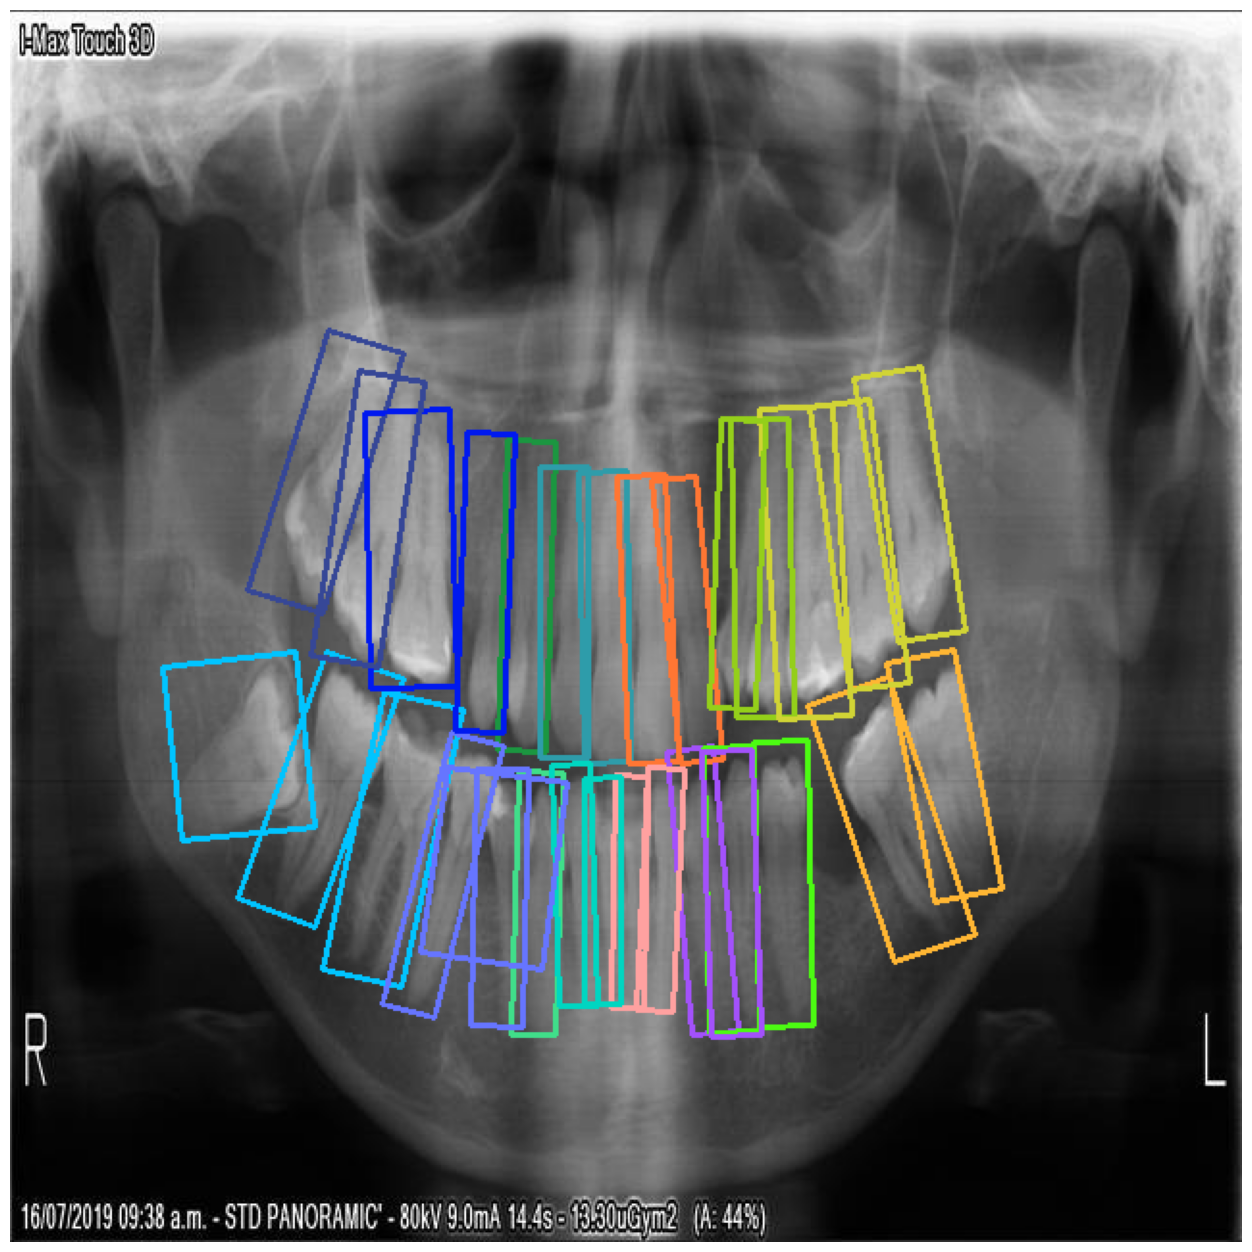

In [ ]:
file_name2 = '/content/drive/MyDrive/IOU testing/IoU test/387_jpg.rf.bbba86d6c7f9c9dd610eceb05e123bd3.jpg'
result1 = model(file_name2)
detections = sv.Detections.from_ultralytics(result1[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name2),
    detections=detections
)

sv.plot_image(image=annotated_frame, size=(16, 16))

In [ ]:
#results = model('/content/387_jpg.rf.bbba86d6c7f9c9dd610eceb05e123bd3.jpg')
obb1 = result1[0].obb
xywhr1 = obb1.xywhr
print(xywhr1.shape)
print(xywhr1)
#torch.Size([31, 5])
if xywhr1.is_cuda:  # Check if the tensor is on GPU
    xywhr1 = xywhr.cpu()  # Move the tensor to the CPU

# Now, you can safely convert to numpy
xywhr1 = xywhr1.numpy()


torch.Size([31, 5])
tensor([[119.1904, 382.8243,  91.3275,  69.1143,   1.4644],
        [322.0364, 458.1724, 120.3958,  17.0214,   1.5876],
        [485.5851, 398.3461, 126.2894,  36.3306,   1.3731],
        [161.6002, 404.5827, 136.8230,  42.2952,   1.9121],
        [198.9195, 431.1022, 147.7169,  41.5130,   1.7891],
        [390.9448, 290.0955, 155.1307,  30.0274,   1.5559],
        [268.5250, 304.6404, 161.4839,  24.9275,   1.6046],
        [457.8505, 420.9737, 141.0396,  44.7441,   1.2474],
        [309.2941, 315.4148, 151.1861,  24.2351,   1.5529],
        [331.3630, 316.6590, 149.0667,  25.7147,   1.5244],
        [274.3206, 464.1538, 137.0379,  23.0569,   1.6003],
        [467.6118, 257.1278, 138.8367,  35.4215,   1.4047],
        [308.0197, 457.5621, 117.1763,  18.7431,   1.5655],
        [164.2805, 239.9152, 141.5287,  40.6845,   1.8720],
        [359.9500, 457.9026, 148.4401,  23.9192,   1.4806],
        [352.2914, 316.9289, 147.4017,  22.9674,   1.4725],
        [337.9963, 4

In [ ]:
!pip install torch -q # Install torch if not already installed

import torch  # Import the torch module

import numpy as np

In [ ]:
import numpy as np

# Example extracted bounding boxes for two images

xywhr1 = torch.tensor([[263.8897, 466.2540, 135.6880,  30.7303,   1.7283],
        [252.9921, 327.8450, 142.3151,  31.0759,   1.6203],
        [334.6184, 337.7638, 138.5678,  31.9733,   1.6030],
        [183.7394, 449.0874, 145.3243,  49.5958,   1.8489],
        [386.8553, 328.6321, 135.8313,  30.2557,   1.5267],
        [114.7902, 271.0251, 126.2562,  38.8337,   1.6996],
        [457.0492, 295.1251, 143.7494,  41.7645,   1.5618],
        [490.9828, 419.3825, 138.2098,  47.2528,   1.3380],
        [233.2439, 324.7299, 129.1691,  30.0767,   1.6402],
        [452.7194, 437.5157, 143.6225,  51.1724,   1.3147],
        [348.1642, 460.8448, 105.6589,  25.0821,   1.5575],
        [215.2529, 463.2667, 140.0811,  35.8934,   1.7605],
        [143.2716, 429.1735, 138.1638,  46.9989,   1.8390],
        [147.1607, 287.0250, 138.1449,  41.1110,   1.6573],
        [180.7863, 304.8603, 133.6939,  44.1298,   1.5366],
        [292.0185, 462.9477, 110.3682,  25.1291,   1.5528],
        [420.7166, 450.6661, 135.7115,  33.1160,   1.4546],
        [371.4447, 462.5677, 123.6696,  29.4138,   1.4833],
        [515.8602, 261.1938, 129.0139,  39.4135,   1.3701],
        [303.4770, 336.0616, 145.1563,  33.3247,   1.5510],
        [212.2064, 314.8378, 133.4792,  29.7302,   1.6172],
        [361.4544, 336.8431, 123.7335,  26.3587,   1.5881],
        [395.6310, 452.3989, 119.6408,  29.9909,   1.5050],
        [427.6751, 308.5098, 135.1921,  32.4982,   1.5379],
        [407.3287, 319.2087, 135.2725,  30.7927,   1.5305],
        [277.8365, 333.0490, 128.8291,  29.4338,   1.5605],
        [105.5755, 394.0237, 123.1905,  50.5487,   1.8882],
        [329.6957, 459.0698, 100.1398,  22.2490,   1.5226],
        [522.4644, 386.0261, 123.4510,  45.0287,   1.3668],
        [488.1597, 284.1692, 132.6093,  38.5256,   1.4765],
        [312.4457, 459.9365,  99.2489,  21.5208,   1.5376],
        [239.5683, 463.7896, 124.5440,  30.8761,   1.7000]])



xywhr2 = torch.tensor([[119.1904, 382.8243,  91.3275,  69.1143,   1.4644],
        [322.0364, 458.1724, 120.3958,  17.0214,   1.5876],
        [485.5851, 398.3461, 126.2894,  36.3306,   1.3731],
        [161.6002, 404.5827, 136.8230,  42.2952,   1.9121],
        [198.9195, 431.1022, 147.7169,  41.5130,   1.7891],
        [390.9448, 290.0955, 155.1307,  30.0274,   1.5559],
        [268.5250, 304.6404, 161.4839,  24.9275,   1.6046],
        [457.8505, 420.9737, 141.0396,  44.7441,   1.2474],
        [309.2941, 315.4148, 151.1861,  24.2351,   1.5529],
        [331.3630, 316.6590, 149.0667,  25.7147,   1.5244],
        [274.3206, 464.1538, 137.0379,  23.0569,   1.6003],
        [467.6118, 257.1278, 138.8367,  35.4215,   1.4047],
        [308.0197, 457.5621, 117.1763,  18.7431,   1.5655],
        [164.2805, 239.9152, 141.5287,  40.6845,   1.8720],
        [359.9500, 457.9026, 148.4401,  23.9192,   1.4806],
        [352.2914, 316.9289, 147.4017,  22.9674,   1.4725],
        [337.9963, 457.0078, 126.6558,  19.2086,   1.6219],
        [225.0677, 449.4380, 145.5107,  28.1801,   1.8222],
        [293.4192, 454.8144, 125.7645,  20.7308,   1.5391],
        [401.7747, 453.9199, 148.3557,  28.0130,   1.5490],
        [441.6289, 277.9214, 148.4252,  30.8346,   1.4282],
        [287.9317, 312.8014, 151.4726,  24.7411,   1.5711],
        [208.2339, 280.3215, 143.6409,  44.2344,   1.5469],
        [254.4551, 461.0646, 133.3639,  27.1181,   1.5974],
        [186.4002, 264.4763, 149.8847,  34.8933,   1.7362],
        [247.1015, 297.5030, 155.5332,  25.4568,   1.6085],
        [375.3218, 456.9623, 147.6317,  26.1195,   1.5502],
        [413.6550, 287.2086, 161.1735,  38.4994,   1.5079],
        [378.2243, 287.9903, 149.8365,  23.3388,   1.6073],
        [251.5529, 445.6724,  97.4062,  63.2848,   1.7107],
        [375.1066, 459.0914, 147.7946,  25.8990,   1.5348]])

# Step 1: Convert xywhr to xyxy (x_min, y_min, x_max, y_max)
def xywhr_to_xyxy(xywhr):
    """
    Converts a bounding box in [x_center, y_center, width, height, rotation] format
    to the [x_min, y_min, x_max, y_max] format without handling rotation.
    """
    x_center, y_center, width, height, _ = xywhr
    x_min = x_center - width / 2
    y_min = y_center - height / 2
    x_max = x_center + width / 2
    y_max = y_center + height / 2
    return [x_min, y_min, x_max, y_max]

# Convert all bounding boxes to xyxy
boxes1 = np.array([xywhr_to_xyxy(box) for box in xywhr1])
boxes2 = np.array([xywhr_to_xyxy(box) for box in xywhr2])

# Step 2: Calculate IoU for each pair of boxes
def calculate_iou(box1, box2):
    """
    Calculate the Intersection over Union (IoU) for two bounding boxes in
    [x_min, y_min, x_max, y_max] format.
    """
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    # Calculate the intersection
    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    # Check if there is no intersection
    if inter_x_max < inter_x_min or inter_y_max < inter_y_min:
        return 0.0

    # Calculate intersection area
    inter_area = (inter_x_max - inter_x_min) * (inter_y_max - inter_y_min)

    # Calculate areas of both boxes
    area1 = (x1_max - x1_min) * (y1_max - y1_min)
    area2 = (x2_max - x2_min) * (y2_max - y2_min)

    # Calculate union area
    union_area = area1 + area2 - inter_area

    # Calculate IoU
    iou = inter_area / union_area
    return iou

# Calculate IoU for each pair of boxes
ious = []
for box1 in boxes1:
    for box2 in boxes2:
        iou = calculate_iou(box1, box2)
        ious.append(iou)

# Step 3: Print the IoU for each pair
for idx, iou in enumerate(ious):
    print(f"IoU for box pair {idx + 1}: {iou:.2f}")


IoU for box pair 1: 0.00
IoU for box pair 2: 0.22
IoU for box pair 3: 0.00
IoU for box pair 4: 0.00
IoU for box pair 5: 0.01
IoU for box pair 6: 0.00
IoU for box pair 7: 0.00
IoU for box pair 8: 0.00
IoU for box pair 9: 0.00
IoU for box pair 10: 0.00
IoU for box pair 11: 0.66
IoU for box pair 12: 0.00
IoU for box pair 13: 0.26
IoU for box pair 14: 0.00
IoU for box pair 15: 0.13
IoU for box pair 16: 0.00
IoU for box pair 17: 0.16
IoU for box pair 18: 0.18
IoU for box pair 19: 0.27
IoU for box pair 20: 0.01
IoU for box pair 21: 0.00
IoU for box pair 22: 0.00
IoU for box pair 23: 0.00
IoU for box pair 24: 0.62
IoU for box pair 25: 0.00
IoU for box pair 26: 0.00
IoU for box pair 27: 0.08
IoU for box pair 28: 0.00
IoU for box pair 29: 0.00
IoU for box pair 30: 0.33
IoU for box pair 31: 0.09
IoU for box pair 32: 0.00
IoU for box pair 33: 0.00
IoU for box pair 34: 0.00
IoU for box pair 35: 0.00
IoU for box pair 36: 0.00
IoU for box pair 37: 0.00
IoU for box pair 38: 0.08
IoU for box pair 39: 

In [ ]:
# prompt: discard the box pairs having zero value

import os
from google.colab import drive
import ultralytics
from ultralytics import YOLO
import random
import supervision as sv
import cv2
import torch
import numpy as np

# ... (rest of your existing code)

# Calculate IoU for each pair of boxes and filter out zero-value pairs
ious = []
for i, box1 in enumerate(boxes1):
    for j, box2 in enumerate(boxes2):
        iou = calculate_iou(box1, box2)
        if iou > 0:  # Discard pairs with zero IoU
            ious.append((i, j, iou)) #Store index of boxes along with iou

# Step 3: Print the IoU for each pair
for box_pair in ious:
    i,j,iou = box_pair
    print(f"IoU for box pair (box1 index:{i}, box2 index:{j}): {iou:.2f}")


IoU for box pair (box1 index:0, box2 index:1): 0.22
IoU for box pair (box1 index:0, box2 index:4): 0.01
IoU for box pair (box1 index:0, box2 index:10): 0.66
IoU for box pair (box1 index:0, box2 index:12): 0.26
IoU for box pair (box1 index:0, box2 index:14): 0.13
IoU for box pair (box1 index:0, box2 index:16): 0.16
IoU for box pair (box1 index:0, box2 index:17): 0.18
IoU for box pair (box1 index:0, box2 index:18): 0.27
IoU for box pair (box1 index:0, box2 index:19): 0.01
IoU for box pair (box1 index:0, box2 index:23): 0.62
IoU for box pair (box1 index:0, box2 index:26): 0.08
IoU for box pair (box1 index:0, box2 index:29): 0.33
IoU for box pair (box1 index:0, box2 index:30): 0.09
IoU for box pair (box1 index:1, box2 index:6): 0.08
IoU for box pair (box1 index:1, box2 index:8): 0.21
IoU for box pair (box1 index:1, box2 index:9): 0.16
IoU for box pair (box1 index:1, box2 index:15): 0.10
IoU for box pair (box1 index:1, box2 index:21): 0.21
IoU for box pair (box1 index:2, box2 index:8): 0.09

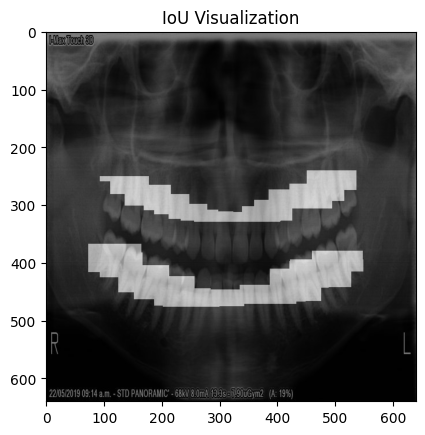

In [ ]:
# prompt: show me the IOU area in 1 image where IOU area will be white and other parts will be black

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_iou(image_path, boxes1, boxes2, ious):
    """Visualizes the IoU area in white and other parts in black."""

    img = plt.imread(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Create a black mask
    mask = np.zeros(img.shape[:2], dtype=np.uint8)

    for i, box1 in enumerate(boxes1):
        for j, box2 in enumerate(boxes2):
          iou = ious[i][j]

          if iou > 0:
              x1_min, y1_min, x1_max, y1_max = box1
              x2_min, y2_min, x2_max, y2_max = box2

              # Calculate intersection coordinates
              inter_x_min = max(x1_min, x2_min)
              inter_y_min = max(y1_min, y2_min)
              inter_x_max = min(x1_max, x2_max)
              inter_y_max = min(y1_max, y2_max)


              # Draw intersection as a white rectangle on the mask
              x = int(inter_x_min)
              y = int(inter_y_min)
              width = int(inter_x_max - inter_x_min)
              height = int(inter_y_max - inter_y_min)
              cv2.rectangle(mask, (x, y), (x + width, y + height), (255, 255, 255), -1)

    # Display the mask
    ax.imshow(mask, alpha=0.5, cmap='gray')  # Overlay with alpha for better visualization
    plt.title("IoU Visualization")
    plt.show()


# Calculate IoU matrix
ious_matrix = np.zeros((len(boxes1), len(boxes2)))
for i, box1 in enumerate(boxes1):
  for j, box2 in enumerate(boxes2):
    ious_matrix[i, j] = calculate_iou(box1, box2)

visualize_iou(file_name, boxes1, boxes2, ious_matrix)
